<a href="https://colab.research.google.com/github/riyaghosall/TAI-IP/blob/main/TECH_A_INTERN_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4 - Housing Price Regression**
Made by- Riya Ghosal

**Step 0- Importing libraries and dataset**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [57]:
housingDF=pd.read_csv("/content/Housing.csv")

In [58]:
housingDF

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**Step 1- Cleaning the dataset**

In [59]:
housingDF.drop_duplicates(keep="first",inplace=True)

In [60]:
housingDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 59.6+ KB


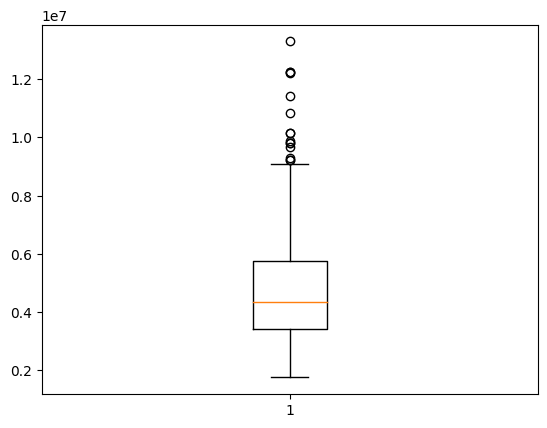

In [61]:
plt.boxplot(housingDF.price)
plt.show()

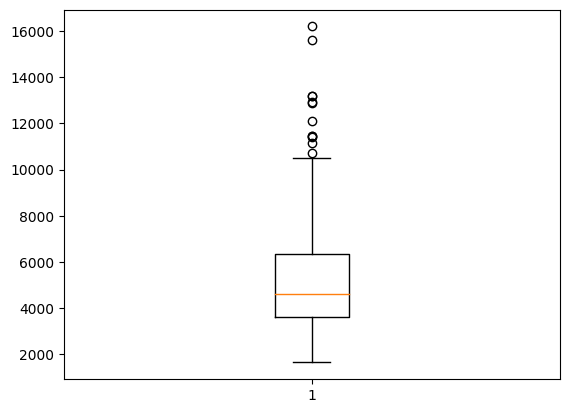

In [62]:
plt.boxplot(housingDF.area)
plt.show()

In [63]:
def outlier_free(data):
 Q1=data.quantile(.25)
 Q3=data.quantile(.75)
 IQR=Q3-Q1
 upwhisk=Q3+(IQR*1.5)
 lowhisk=Q1-(IQR*1.5)
 for i in range(len(housingDF)):
  if data[i]>upwhisk:
   data[i]=upwhisk
  elif data[i]<lowhisk:
   data[i]=lowhisk

In [64]:
outlier_free(housingDF.area)


<ipython-input-63-5540dc60c4af>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=upwhisk


In [65]:
outlier_free(housingDF.price)

<ipython-input-63-5540dc60c4af>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=upwhisk


**Step2- Visualizing the data set**

In [66]:
housingDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 75.8+ KB


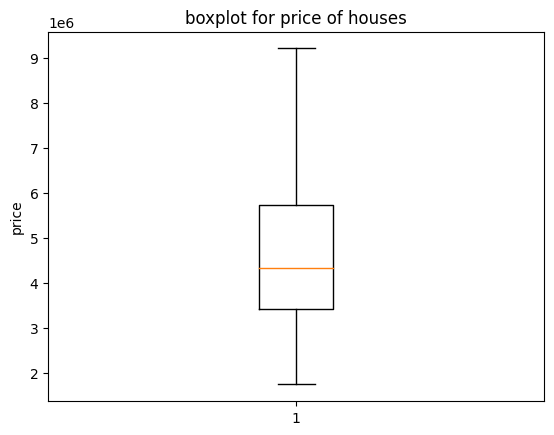

In [67]:
plt.boxplot(housingDF.price)
plt.ylabel("price")
plt.title("boxplot for price of houses")
plt.show()


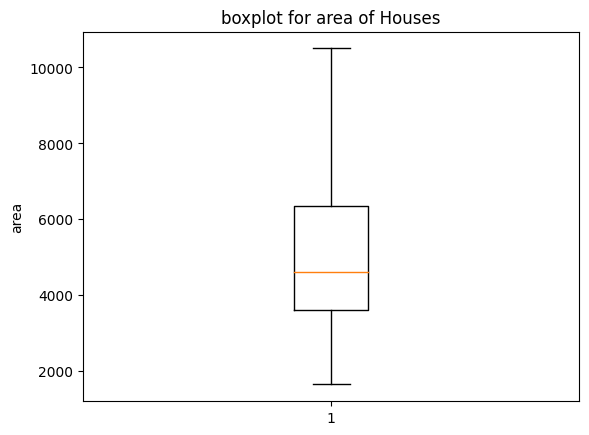

In [68]:
plt.boxplot(housingDF.area)
plt.ylabel("area")
plt.title("boxplot for area of Houses")
plt.show()

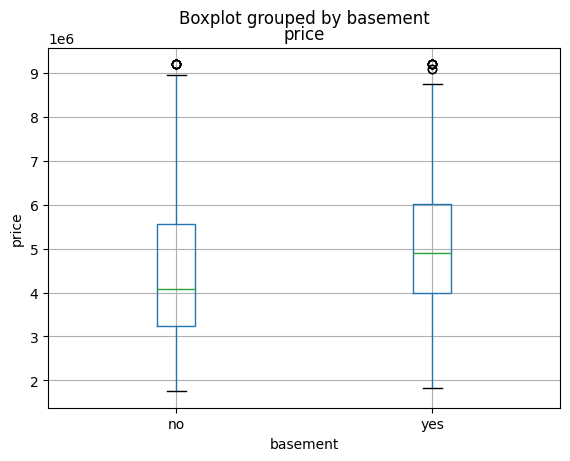

In [69]:
housingDF.boxplot(column="price",by="basement")
plt.xlabel("basement")
plt.ylabel("price")
plt.show()

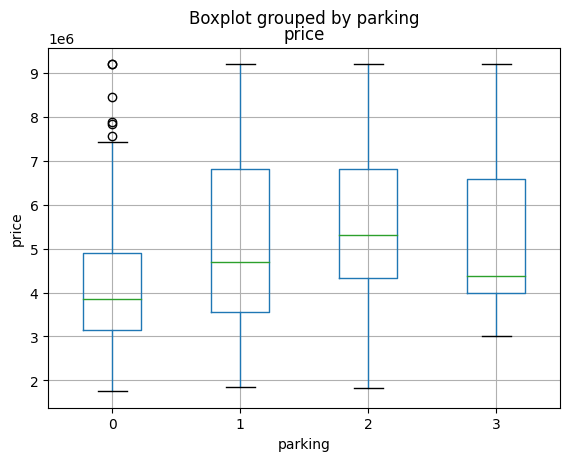

In [70]:
housingDF.boxplot(column="price",by="parking")
plt.xlabel("parking")
plt.ylabel("price")
plt.show()

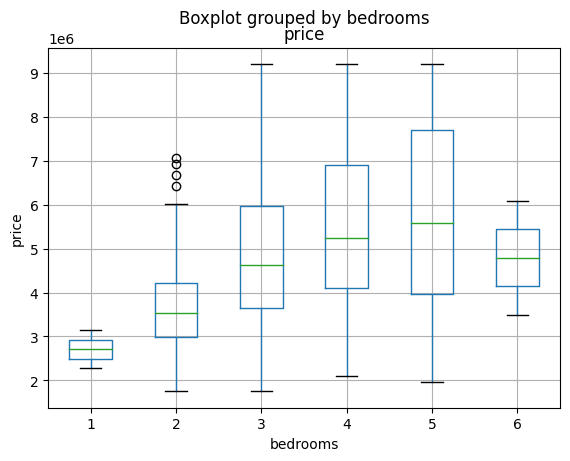

In [71]:
housingDF.boxplot(column="price",by="bedrooms")
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

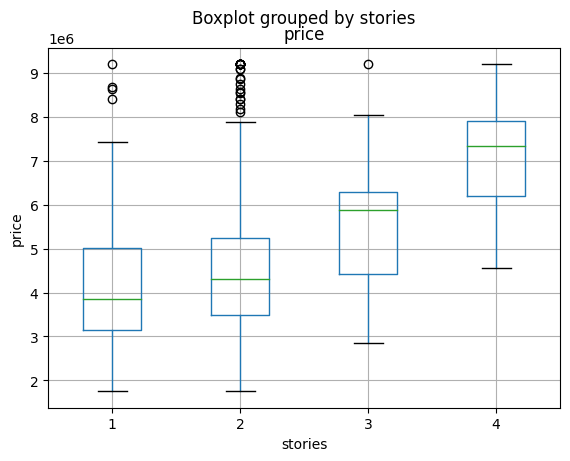

In [72]:
housingDF.boxplot(column="price",by="stories")
plt.xlabel("stories")
plt.ylabel("price")
plt.show()

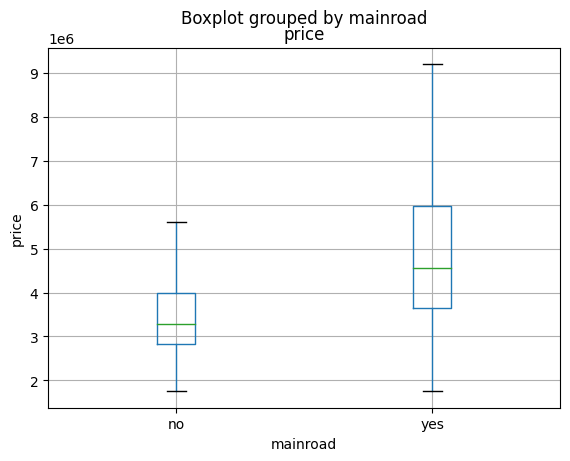

In [73]:
housingDF.boxplot(column="price",by="mainroad")
plt.xlabel("mainroad")
plt.ylabel("price")
plt.show()


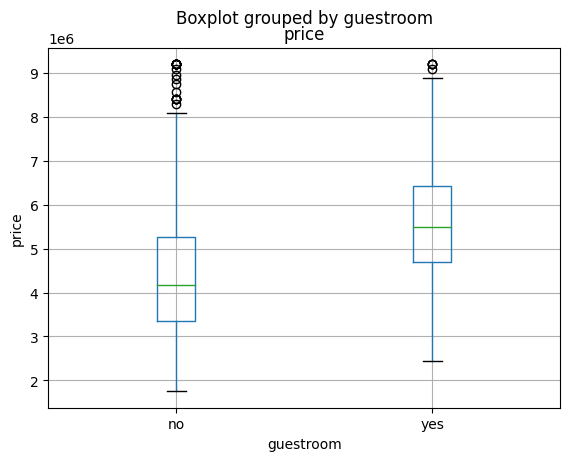

In [74]:
housingDF.boxplot(column="price",by="guestroom")
plt.xlabel("guestroom")
plt.ylabel("price")
plt.show()

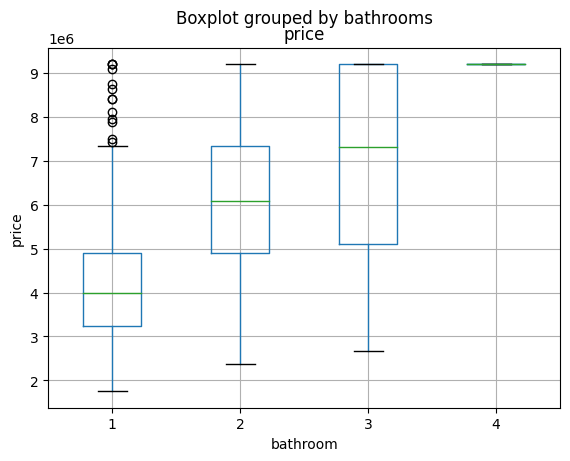

In [75]:
housingDF.boxplot(column="price",by="bathrooms")
plt.ylabel("price")
plt.xlabel("bathroom")
plt.show()

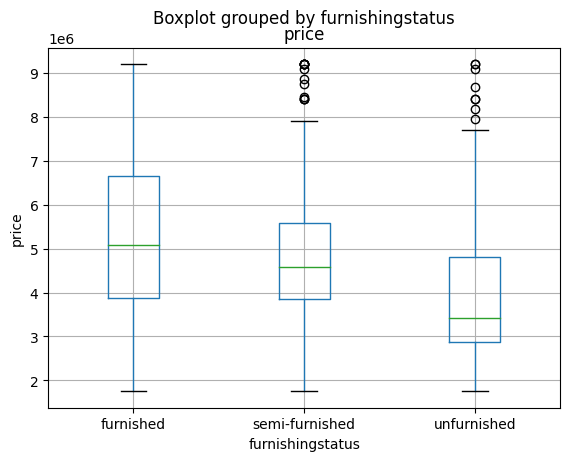

In [76]:
housingDF.boxplot(column="price",by="furnishingstatus")
plt.xlabel("furnishingstatus")
plt.ylabel("price")
plt.show()

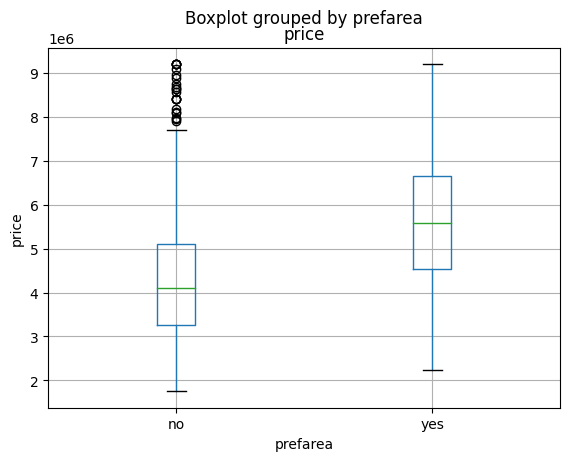

In [77]:
housingDF.boxplot(column="price",by="prefarea")
plt.xlabel("prefarea")
plt.ylabel("price")
plt.show()

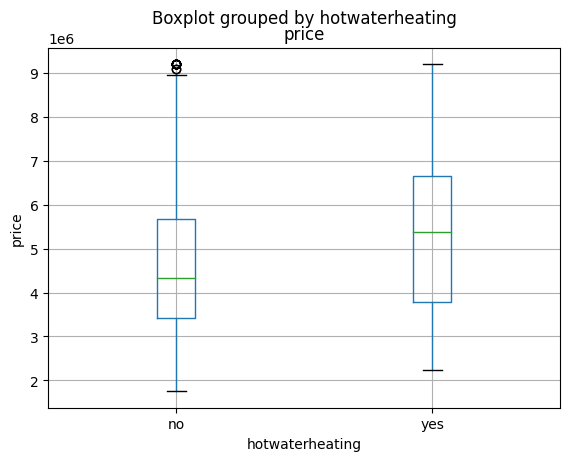

In [78]:
housingDF.boxplot(column="price",by="hotwaterheating")
plt.xlabel("hotwaterheating")
plt.ylabel("price")
plt.show()

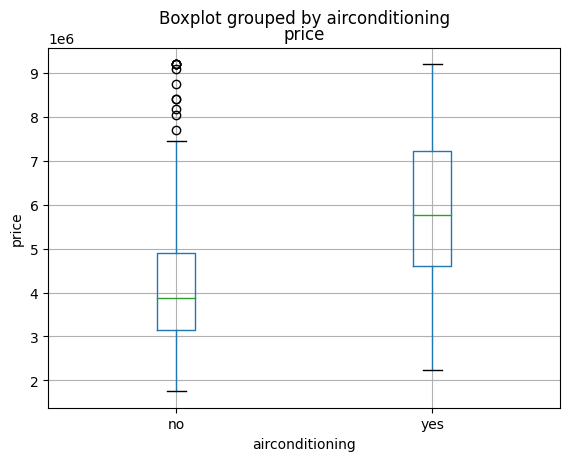

In [79]:
housingDF.boxplot(column="price",by="airconditioning")
plt.xlabel("airconditioning")
plt.ylabel("price")
plt.show()


In [80]:
housingDF=pd.get_dummies(housingDF,drop_first=False)

In [81]:
housingDF

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,9205000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,9205000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,9205000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,9205000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


**Step3- Creating Multiple Linear regression plot**

In [82]:
x1=housingDF.drop(columns="price")

In [83]:
y1=housingDF["price"]

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(381, 20) (164, 20) (381,) (164,)


In [85]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

**Step4- Visualising regression plots**

<Axes: xlabel='area', ylabel='price'>

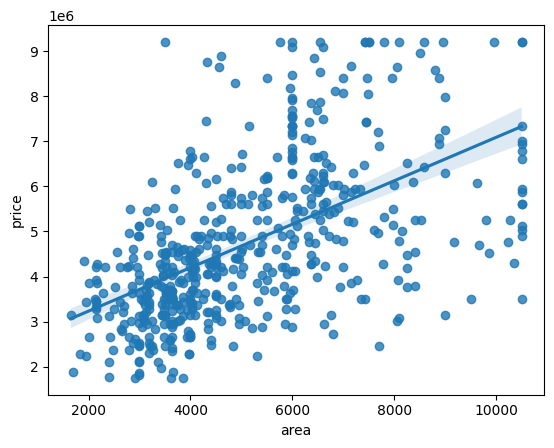

In [86]:
sns.regplot(x="area",y="price",data=housingDF)

<Axes: xlabel='bedrooms', ylabel='price'>

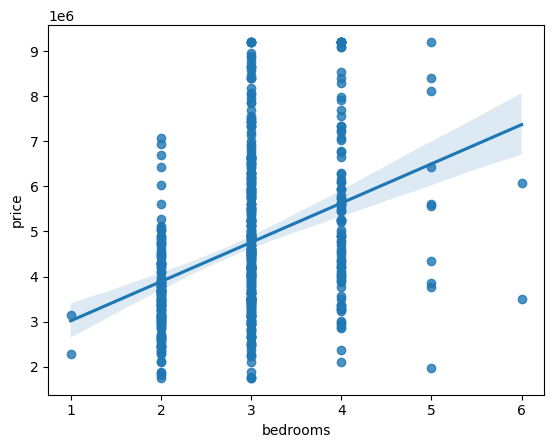

In [87]:

sns.regplot(x="bedrooms",y="price",data=housingDF)


<Axes: xlabel='bathrooms', ylabel='price'>

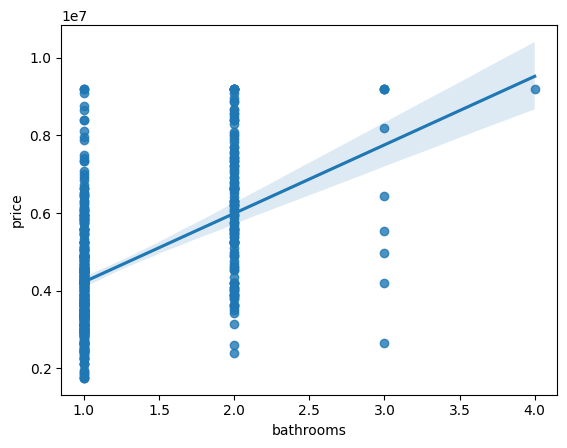

In [88]:
 sns.regplot(x="bathrooms",y="price",data=housingDF)

<Axes: xlabel='stories', ylabel='price'>

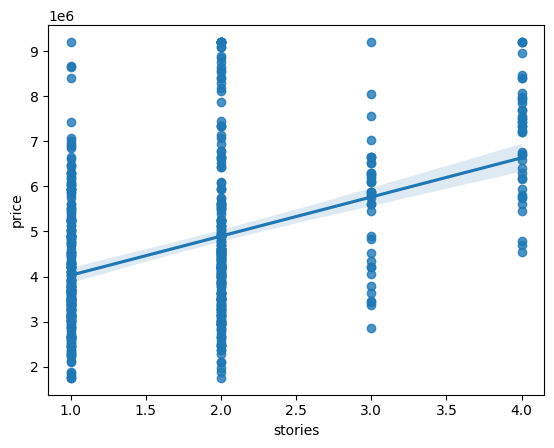

In [89]:

sns.regplot(x="stories",y="price",data=housingDF)

<Axes: xlabel='parking', ylabel='price'>

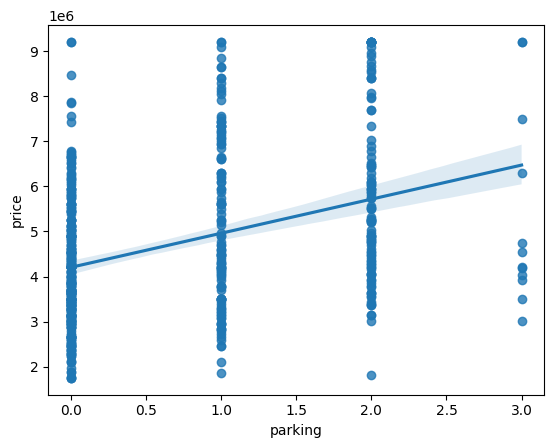

In [90]:
 sns.regplot(x="parking",y="price",data=housingDF)

<Axes: xlabel='mainroad_yes', ylabel='price'>

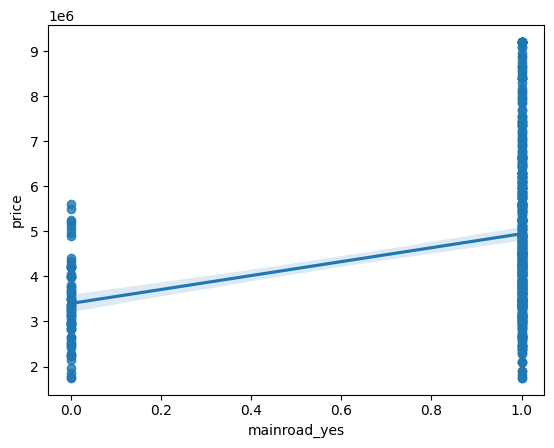

In [91]:
sns.regplot(x="mainroad_yes",y="price",data=housingDF)

<Axes: xlabel='furnishingstatus_semi-furnished', ylabel='price'>

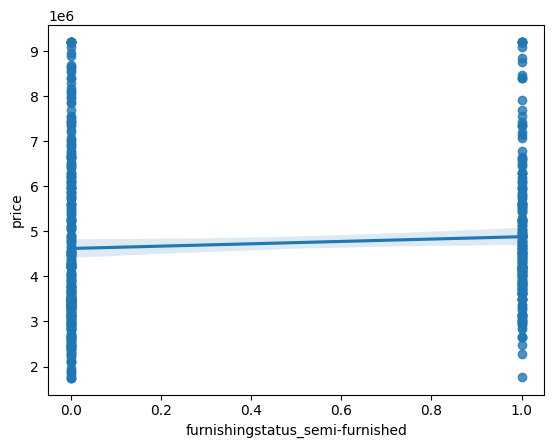

In [92]:
 sns.regplot(x="furnishingstatus_semi-furnished",y="price",data=housingDF)

<Axes: xlabel='prefarea_yes', ylabel='price'>

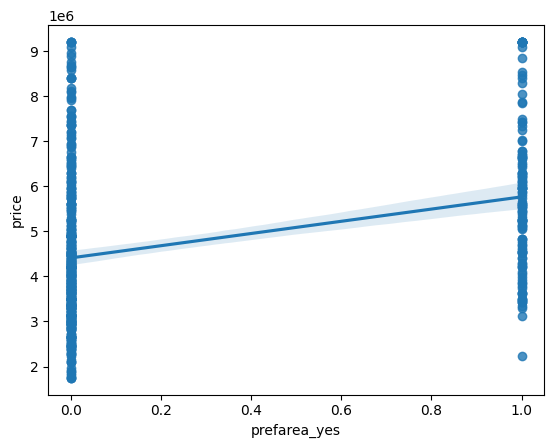

In [93]:
sns.regplot(x="prefarea_yes",y="price",data=housingDF)

<Axes: xlabel='guestroom_yes', ylabel='price'>

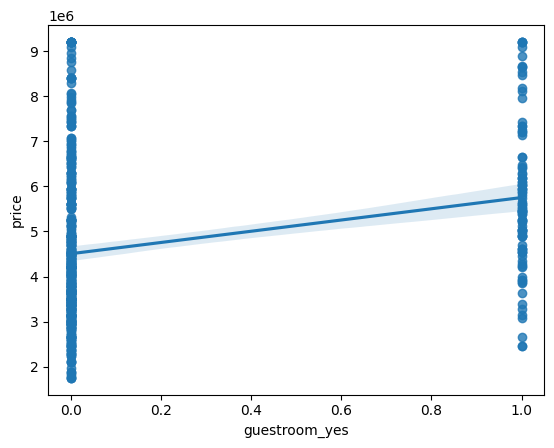

In [94]:
 sns.regplot(x="guestroom_yes",y="price",data=housingDF)

<Axes: xlabel='furnishingstatus_unfurnished', ylabel='price'>

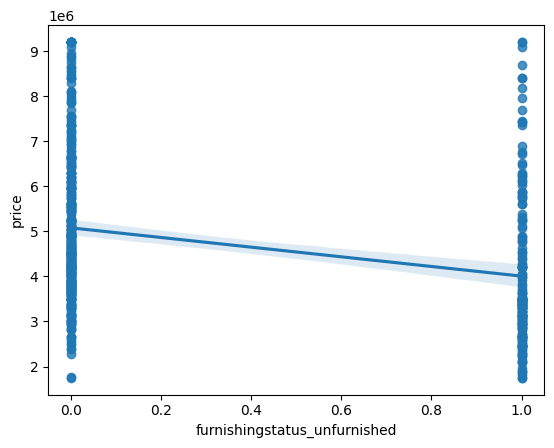

In [95]:
sns.regplot(x="furnishingstatus_unfurnished",y="price",data=housingDF)

<Axes: xlabel='basement_yes', ylabel='price'>

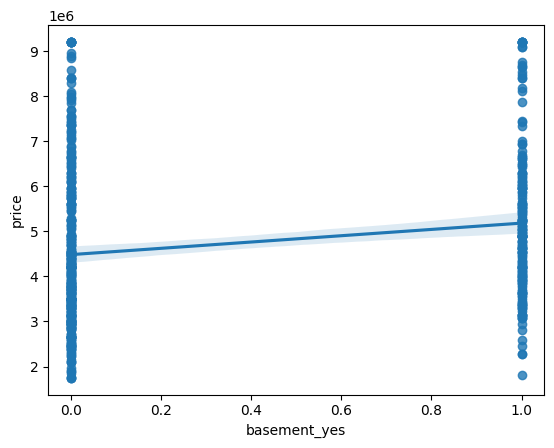

In [96]:
sns.regplot(x="basement_yes",y="price",data=housingDF)

<Axes: xlabel='hotwaterheating_yes', ylabel='price'>

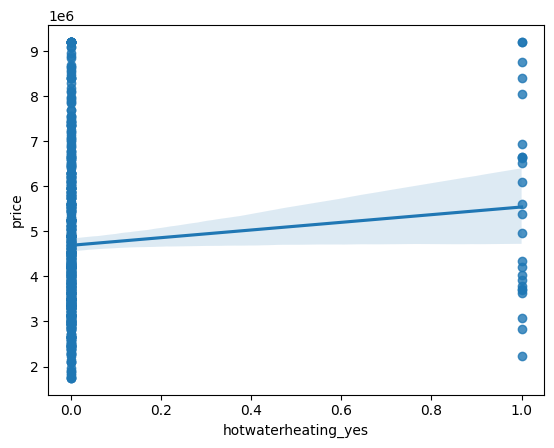

In [97]:
sns.regplot(x="hotwaterheating_yes",y="price",data=housingDF)


**Step 5- Calculating predicted value**

In [98]:

y_predict=reg.predict(x_test)
y_predict

array([4082804.60008501, 3938210.69368539, 4983163.73390402,
       5875780.93010601, 4215491.10804557, 4648562.51583524,
       5086149.32234858, 8184548.12814046, 3571214.62040676,
       4831145.23951528, 2894073.27253366, 6221140.45516503,
       7564171.99175185, 6573729.7920722 , 4642164.50369002,
       3865590.33369433, 2979314.68272901, 6539732.2142516 ,
       4698072.4203603 , 6531917.16926106, 3652610.8712881 ,
       2780553.63263617, 3682426.09734984, 3709711.29230723,
       7279931.08845963, 5206153.48947285, 5079614.83164484,
       7096301.86223525, 2155046.62057725, 3115171.98695232,
       8224343.60503522, 4086488.15167556, 2488897.57640651,
       5846992.39262859, 6686762.22227505, 4094400.40402886,
       5219435.61122178, 5478209.78896817, 5196433.16911119,
       6924977.78144857, 4872919.50219602, 4817026.43147699,
       4250661.02089953, 3649852.44978033, 4941453.75231875,
       5325726.44184286, 6292763.80816825, 3596000.56664667,
       4462372.90007397,

**Step 6- Evaluating the model**

In [99]:
mean_squared_error(y_test,y_predict)

1232163379733.277

In [100]:
reg.score(x_train,y_train)

0.7372490645756504